# 43-modeling-regression

> Building a regression model that uses iPhone 13 data to predict iPhone 14 March 2023 claims.

The WMAPE of the linear regression model that is using iPhone 13 data with iPhone 13 testing data is 13.93
The WMAPE of the linear regression model that is using iPhone 13 data with iPhone 14 testing data is 193.77

The final prediction values of iPhone 14 claims are:
- 3/6/23: 557 iPhone 14 claims
- 3/13/23: 628 iPhone 14 claims
- 3/20/23: 633 iPhone 14 claims
- 3/27/23: 704 iPhone 14 claims

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
import os
from datetime import datetime

from sklearn.linear_model import LinearRegression

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [2]:
#Constants/globals
os.chdir('/data/p_dsi/teams2023/team9/')
os.getcwd()

In [3]:
#load the data
data = pd.read_csv("Asurion_clean_data_feature_set.csv")
display(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11684 entries, 0 to 11683
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   phone model       11684 non-null  object
 1   phone size        11684 non-null  object
 2   phone color       11684 non-null  object
 3   claim             11684 non-null  int64 
 4   weeks_monday      11684 non-null  object
 5   month             11684 non-null  object
 6   year              11684 non-null  int64 
 7   season            11684 non-null  object
 8   quarter           11684 non-null  object
 9   Holidays_Boolean  11684 non-null  bool  
 10  company           11684 non-null  object
 11  model_group       11684 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 1015.6+ KB


None

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group
0,apple iphone 11,128gb,black,252,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
1,apple iphone 11,128gb,green,45,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
2,apple iphone 11,128gb,purple,92,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
3,apple iphone 11,128gb,red,69,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
4,apple iphone 11,128gb,white,91,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
5,apple iphone 11,128gb,yellow,5,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
6,apple iphone 11,256gb,black,24,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
7,apple iphone 11,256gb,green,3,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
8,apple iphone 11,256gb,purple,7,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
9,apple iphone 11,256gb,red,9,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11


In [4]:
data_copy = data.copy()
# Converted it to a datetime object so that since_release can be used
data_copy['weeks_monday'] = pd.to_datetime(data_copy['weeks_monday'].str.strip(), format='%Y-%m-%d')

display(data_copy)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group
0,apple iphone 11,128gb,black,252,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
1,apple iphone 11,128gb,green,45,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
2,apple iphone 11,128gb,purple,92,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
3,apple iphone 11,128gb,red,69,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
4,apple iphone 11,128gb,white,91,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
...,...,...,...,...,...,...,...,...,...,...,...,...
11679,apple iphone xs max,256gb,silver,4,2023-02-13,February,2023,winter,Q1,False,apple,iphone x
11680,apple iphone xs max,512gb,gray,2,2023-02-13,February,2023,winter,Q1,False,apple,iphone x
11681,apple iphone xs max,64gb,gold,12,2023-02-13,February,2023,winter,Q1,False,apple,iphone x
11682,apple iphone xs max,64gb,gray,8,2023-02-13,February,2023,winter,Q1,False,apple,iphone x


In [5]:
iphone13 = data_copy[data_copy["model_group"] == "iphone 13"]
iphone14 = data_copy[data_copy["model_group"] == "iphone 14"]

iphone13 = iphone13.assign(since_release = lambda x: (x.weeks_monday - datetime.strptime("2021-09-24", '%Y-%m-%d')))
iphone14 = iphone14.assign(since_release = lambda x: (x.weeks_monday - datetime.strptime("2022-09-16", '%Y-%m-%d')))
iphone13["since_release"] = iphone13["since_release"].astype(str)
iphone13["since_release"] = iphone13["since_release"].str.split().str[0].astype(int)
iphone14["since_release"] = iphone14["since_release"].astype(str)
iphone14["since_release"] = iphone14["since_release"].str.split().str[0].astype(int)

In [6]:
iphone13

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,since_release
63,apple iphone 13,128gb,midnight,11,2022-01-24,January,2022,winter,Q1,False,apple,iphone 13,122
189,apple iphone 13,128gb,blue,144,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,416
190,apple iphone 13,128gb,green,13,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,416
191,apple iphone 13,128gb,midnight,74,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,416
192,apple iphone 13,128gb,pink,128,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11646,apple iphone 13 pro max,256gb,graphite,60,2023-02-13,February,2023,winter,Q1,False,apple,iphone 13,507
11647,apple iphone 13 pro max,256gb,green,12,2023-02-13,February,2023,winter,Q1,False,apple,iphone 13,507
11648,apple iphone 13 pro max,256gb,silver,16,2023-02-13,February,2023,winter,Q1,False,apple,iphone 13,507
11649,apple iphone 13 pro max,512gb,blue,15,2023-02-13,February,2023,winter,Q1,False,apple,iphone 13,507


In [7]:
result_iphone_13 = iphone13.groupby(['since_release'], as_index = False).agg({'claim': np.sum})
result_iphone_13 = result_iphone_13[:65]

result_iphone_14 = iphone14.groupby(['since_release'], as_index = False).agg({'claim': np.sum})
result_iphone_14 = result_iphone_14[:-1]

In [8]:
result_iphone_14

,since_release,claim
0,59,9
1,66,30
2,73,23
3,80,43
4,87,32
5,94,36
6,101,44
7,108,45
8,115,59
9,122,60


In [9]:
iphone13

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,since_release
63,apple iphone 13,128gb,midnight,11,2022-01-24,January,2022,winter,Q1,False,apple,iphone 13,122
189,apple iphone 13,128gb,blue,144,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,416
190,apple iphone 13,128gb,green,13,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,416
191,apple iphone 13,128gb,midnight,74,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,416
192,apple iphone 13,128gb,pink,128,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11646,apple iphone 13 pro max,256gb,graphite,60,2023-02-13,February,2023,winter,Q1,False,apple,iphone 13,507
11647,apple iphone 13 pro max,256gb,green,12,2023-02-13,February,2023,winter,Q1,False,apple,iphone 13,507
11648,apple iphone 13 pro max,256gb,silver,16,2023-02-13,February,2023,winter,Q1,False,apple,iphone 13,507
11649,apple iphone 13 pro max,512gb,blue,15,2023-02-13,February,2023,winter,Q1,False,apple,iphone 13,507


In [10]:
# Making a copy to use
result_iphone_13_copy = result_iphone_13.copy()
result_iphone_14_copy = result_iphone_14.copy()

iphone13_features = iphone13.copy()

iphone13_features.drop(iphone13_features.columns[[0, 1, 2, 3, 4, 5, 10, 11 ]], axis = 1, inplace = True)
display(iphone13_features)


iphone14_features = iphone14.copy()

iphone14_features.drop(iphone14_features.columns[[0, 1, 2, 3, 4, 5, 10, 11 ]], axis = 1, inplace = True)
display(iphone14_features)

,year,season,quarter,Holidays_Boolean,since_release
63,2022,winter,Q1,False,122
189,2022,autumn,Q4,False,416
190,2022,autumn,Q4,False,416
191,2022,autumn,Q4,False,416
192,2022,autumn,Q4,False,416
...,...,...,...,...,...
11646,2023,winter,Q1,False,507
11647,2023,winter,Q1,False,507
11648,2023,winter,Q1,False,507
11649,2023,winter,Q1,False,507


,year,season,quarter,Holidays_Boolean,since_release
228,2022,autumn,Q4,False,59
229,2022,autumn,Q4,False,59
393,2022,autumn,Q4,True,66
394,2022,autumn,Q4,True,66
395,2022,autumn,Q4,True,66
...,...,...,...,...,...
11651,2023,winter,Q1,False,150
11652,2023,winter,Q1,False,150
11653,2023,winter,Q1,False,150
11654,2023,winter,Q1,False,150


In [11]:
# sorting by first name
iphone13_features.sort_values("since_release", inplace=True)

# dropping all duplicate values
iphone13_features.drop_duplicates(subset="since_release", keep= 'first', inplace=True)
iphone13_features = iphone13_features[:65]

# data_copy can be used to combine any of the iphone data together to make complete set
display(iphone13_features)

display(result_iphone_13_copy)


# sorting by first name
iphone14_features.sort_values("since_release", inplace=True)

# dropping all duplicate values
iphone14_features.drop_duplicates(subset="since_release", keep= 'first', inplace=True)
iphone14_features = iphone14_features[:13]

display(iphone14_features)

# data_copy can be used to combine any of the iphone data together to make complete set
display(result_iphone_14_copy)

,year,season,quarter,Holidays_Boolean,since_release
5953,2021,autumn,Q4,False,52
6061,2021,autumn,Q4,True,59
6168,2021,autumn,Q4,False,66
6278,2021,autumn,Q4,False,73
6389,2021,autumn,Q4,False,80
...,...,...,...,...,...
3726,2023,winter,Q1,False,472
3892,2023,winter,Q1,True,479
11136,2023,winter,Q1,False,486
11304,2023,winter,Q1,False,493


,since_release,claim
0,52,2
1,59,3
2,66,6
3,73,2
4,80,10
...,...,...
60,472,3616
61,479,3828
62,486,4090
63,493,3740


,year,season,quarter,Holidays_Boolean,since_release
228,2022,autumn,Q4,False,59
393,2022,autumn,Q4,True,66
564,2022,autumn,Q4,False,73
3136,2022,autumn,Q4,False,80
725,2022,autumn,Q4,False,87
3282,2022,autumn,Q4,False,94
3420,2022,winter,Q4,True,101
3576,2023,winter,Q1,True,108
3748,2023,winter,Q1,False,115
3911,2023,winter,Q1,True,122


,since_release,claim
0,59,9
1,66,30
2,73,23
3,80,43
4,87,32
5,94,36
6,101,44
7,108,45
8,115,59
9,122,60


In [20]:
total_set_13 = pd.merge(result_iphone_13_copy, iphone13_features, on= "since_release", how = "inner")
display(total_set_13)

total_set_14 = pd.merge(result_iphone_14_copy, iphone14_features, on= "since_release", how = "inner")
display(total_set_14)

,since_release,claim,year,season,quarter,Holidays_Boolean
0,52,2,2021,autumn,Q4,False
1,59,3,2021,autumn,Q4,True
2,66,6,2021,autumn,Q4,False
3,73,2,2021,autumn,Q4,False
4,80,10,2021,autumn,Q4,False
...,...,...,...,...,...,...
60,472,3616,2023,winter,Q1,False
61,479,3828,2023,winter,Q1,True
62,486,4090,2023,winter,Q1,False
63,493,3740,2023,winter,Q1,False


,since_release,claim,year,season,quarter,Holidays_Boolean
0,59,9,2022,autumn,Q4,False
1,66,30,2022,autumn,Q4,True
2,73,23,2022,autumn,Q4,False
3,80,43,2022,autumn,Q4,False
4,87,32,2022,autumn,Q4,False
5,94,36,2022,autumn,Q4,False
6,101,44,2022,winter,Q4,True
7,108,45,2023,winter,Q1,True
8,115,59,2023,winter,Q1,False
9,122,60,2023,winter,Q1,True


## Regression Modeling

In [21]:
display(total_set_13)

display(total_set_14)

,since_release,claim,year,season,quarter,Holidays_Boolean
0,52,2,2021,autumn,Q4,False
1,59,3,2021,autumn,Q4,True
2,66,6,2021,autumn,Q4,False
3,73,2,2021,autumn,Q4,False
4,80,10,2021,autumn,Q4,False
...,...,...,...,...,...,...
60,472,3616,2023,winter,Q1,False
61,479,3828,2023,winter,Q1,True
62,486,4090,2023,winter,Q1,False
63,493,3740,2023,winter,Q1,False


,since_release,claim,year,season,quarter,Holidays_Boolean
0,59,9,2022,autumn,Q4,False
1,66,30,2022,autumn,Q4,True
2,73,23,2022,autumn,Q4,False
3,80,43,2022,autumn,Q4,False
4,87,32,2022,autumn,Q4,False
5,94,36,2022,autumn,Q4,False
6,101,44,2022,winter,Q4,True
7,108,45,2023,winter,Q1,True
8,115,59,2023,winter,Q1,False
9,122,60,2023,winter,Q1,True


In [22]:
# Doing prep work so that I can use Pandas' one hot encoding
total_set_13_copy = total_set_13.copy()

total_set_13_copy['Holidays_Boolean'] = np.where(total_set_13_copy['Holidays_Boolean'] == True, 'Holidays_True', 'Holidays_False')
display(total_set_13_copy )

total_set_14_copy = total_set_14.copy()

total_set_14_copy['Holidays_Boolean'] = np.where(total_set_14_copy['Holidays_Boolean'] == True, 'Holidays_True', 'Holidays_False')
display(total_set_14_copy)

,since_release,claim,year,season,quarter,Holidays_Boolean
0,52,2,2021,autumn,Q4,Holidays_False
1,59,3,2021,autumn,Q4,Holidays_True
2,66,6,2021,autumn,Q4,Holidays_False
3,73,2,2021,autumn,Q4,Holidays_False
4,80,10,2021,autumn,Q4,Holidays_False
...,...,...,...,...,...,...
60,472,3616,2023,winter,Q1,Holidays_False
61,479,3828,2023,winter,Q1,Holidays_True
62,486,4090,2023,winter,Q1,Holidays_False
63,493,3740,2023,winter,Q1,Holidays_False


,since_release,claim,year,season,quarter,Holidays_Boolean
0,59,9,2022,autumn,Q4,Holidays_False
1,66,30,2022,autumn,Q4,Holidays_True
2,73,23,2022,autumn,Q4,Holidays_False
3,80,43,2022,autumn,Q4,Holidays_False
4,87,32,2022,autumn,Q4,Holidays_False
5,94,36,2022,autumn,Q4,Holidays_False
6,101,44,2022,winter,Q4,Holidays_True
7,108,45,2023,winter,Q1,Holidays_True
8,115,59,2023,winter,Q1,Holidays_False
9,122,60,2023,winter,Q1,Holidays_True


In [23]:
# Doing one-hot encoding
dummies_season = pd.get_dummies(total_set_13_copy.season)
display(dummies_season)

dummies_quarter = pd.get_dummies(total_set_13_copy.quarter)
display(dummies_quarter)
dummies_holidays = pd.get_dummies(total_set_13_copy.Holidays_Boolean)
display(dummies_holidays)

,autumn,spring,summer,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
60,0,0,0,1
61,0,0,0,1
62,0,0,0,1
63,0,0,0,1


,Q1,Q2,Q3,Q4
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
60,1,0,0,0
61,1,0,0,0
62,1,0,0,0
63,1,0,0,0


,Holidays_False,Holidays_True
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
60,1,0
61,0,1
62,1,0
63,1,0


In [24]:
# Decided to exclude quarter to avoid any potential conflicts with season when creating testing combinations

merged_13 = pd.concat([total_set_13_copy, dummies_season, dummies_holidays], axis = 'columns')
display(merged_13)

final_13 = merged_13.drop(['year','season', 'quarter', 'Holidays_Boolean'], axis = 'columns')

print(final_13)

,since_release,claim,year,season,quarter,Holidays_Boolean,autumn,spring,summer,winter,Holidays_False,Holidays_True
0,52,2,2021,autumn,Q4,Holidays_False,1,0,0,0,1,0
1,59,3,2021,autumn,Q4,Holidays_True,1,0,0,0,0,1
2,66,6,2021,autumn,Q4,Holidays_False,1,0,0,0,1,0
3,73,2,2021,autumn,Q4,Holidays_False,1,0,0,0,1,0
4,80,10,2021,autumn,Q4,Holidays_False,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60,472,3616,2023,winter,Q1,Holidays_False,0,0,0,1,1,0
61,479,3828,2023,winter,Q1,Holidays_True,0,0,0,1,0,1
62,486,4090,2023,winter,Q1,Holidays_False,0,0,0,1,1,0
63,493,3740,2023,winter,Q1,Holidays_False,0,0,0,1,1,0


    since_release  claim  autumn  spring  summer  winter  Holidays_False  \
0              52      2       1       0       0       0               1   
1              59      3       1       0       0       0               0   
2              66      6       1       0       0       0               1   
3              73      2       1       0       0       0               1   
4              80     10       1       0       0       0               1   
..            ...    ...     ...     ...     ...     ...             ...   
60            472   3616       0       0       0       1               1   
61            479   3828       0       0       0       1               0   
62            486   4090       0       0       0       1               1   
63            493   3740       0       0       0       1               1   
64            500   4270       0       0       0       1               1   

    Holidays_True  
0               0  
1               1  
2               0  
3      

In [25]:
# Create feature variable
x = final_13.drop('claim', axis = 1)
y = final_13['claim']

display(x)
display(y)

# Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

,since_release,autumn,spring,summer,winter,Holidays_False,Holidays_True
0,52,1,0,0,0,1,0
1,59,1,0,0,0,0,1
2,66,1,0,0,0,1,0
3,73,1,0,0,0,1,0
4,80,1,0,0,0,1,0
...,...,...,...,...,...,...,...
60,472,0,0,0,1,1,0
61,479,0,0,0,1,0,1
62,486,0,0,0,1,1,0
63,493,0,0,0,1,1,0


0        2
1        3
2        6
3        2
4       10
      ... 
60    3616
61    3828
62    4090
63    3740
64    4270
Name: claim, Length: 65, dtype: int64

In [26]:
display(len(X_train.index))
display(len(y_train.index))

display(X_train)

X_train.size

45

45

,since_release,autumn,spring,summer,winter,Holidays_False,Holidays_True
18,178,0,1,0,0,1,0
27,241,0,1,0,0,1,0
42,346,0,0,1,0,0,1
14,150,0,0,0,1,0,1
62,486,0,0,0,1,1,0
43,353,0,0,1,0,1,0
24,220,0,1,0,0,1,0
20,192,0,1,0,0,1,0
39,325,0,0,1,0,1,0
7,101,0,0,0,1,1,0


315

In [27]:
model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

display(y_pred)

display(y_test)

display(X_train.size)

y_train.size

array([1129.75687148, 3788.3452742 , -117.2897955 ,  845.71068459,
        774.69913787, 2431.04009915, 3823.19985362, 3220.25290043,
       3610.16521345, 2502.05164588, 2174.36681653, -231.93998468,
        485.65715769, 1413.80305836, 3646.32218076, 2360.02855243,
       2573.0631926 ,  414.64561096, 2146.99391227, 1058.74532475])

26    1042
57    2312
2        6
22     872
21     581
36    2724
63    3740
49    3514
60    3616
37    2791
33    2197
1        3
16     234
30    1692
55    3291
35    2446
38    2840
15     138
32    1776
25     951
Name: claim, dtype: int64

315

45

In [28]:
X_train

,since_release,autumn,spring,summer,winter,Holidays_False,Holidays_True
18,178,0,1,0,0,1,0
27,241,0,1,0,0,1,0
42,346,0,0,1,0,0,1
14,150,0,0,0,1,0,1
62,486,0,0,0,1,1,0
43,353,0,0,1,0,1,0
24,220,0,1,0,0,1,0
20,192,0,1,0,0,1,0
39,325,0,0,1,0,1,0
7,101,0,0,0,1,1,0


In [29]:
model.predict(X_train)

values = model.predict(X_train)

display(values)

array([ 561.6644977 , 1200.7684182 , 2813.47073703,  299.99542178,
       3752.1883069 , 2928.12092621,  987.73377803,  703.68759114,
       2644.07473932, -153.44676281, 3433.28754059,  -46.27824878,
       3291.26444715, 2786.09783276, 3424.50347755, 3318.63735141,
       3637.53811772, 1484.81460509, 3149.24135371,   59.58787736,
       2936.20671354, 2999.13247293, 2289.01700571, 3495.51502427,
        -82.43521609,  632.67604442, 3575.31063404, 1342.79151164,
        201.6109708 ,   52.10620221, 3007.21826026, -259.31288895,
       1228.14132246, 3460.66044486, 3717.33372748,   24.73329794,
       2715.08628604,  272.62251752,  -55.06231182, 3034.59116453,
       3894.21140034,  916.72223131, -268.09695199,  556.66870441,
        130.59942408])

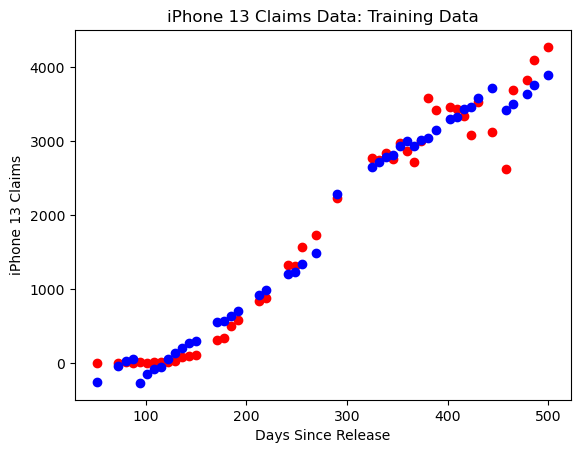

In [34]:
#plot for the TRAIN
 
plt.scatter(X_train['since_release'], y_train, color='red') # plotting the observation line
 
plt.scatter(X_train['since_release'], values, color='blue') # plotting the regression line
 
plt.title("iPhone 13 Claims Data: Training Data") # stating the title of the graph
 
plt.xlabel("Days Since Release") # adding the name of x-axis
plt.ylabel("iPhone 13 Claims") # adding the name of y-axis
plt.show()

In [32]:
X_test

,since_release,autumn,spring,summer,winter,Holidays_False,Holidays_True
26,234,0,1,0,0,1,0
57,451,1,0,0,0,1,0
2,66,1,0,0,0,1,0
22,206,0,1,0,0,1,0
21,199,0,1,0,0,1,0
36,304,0,0,1,0,1,0
63,493,0,0,0,1,1,0
49,395,1,0,0,0,1,0
60,472,0,0,0,1,1,0
37,311,0,0,1,0,1,0


In [33]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
print("Linear Regression R squared of the test set is: {:.2f}".format(r2_score(y_test, y_pred)))

# 90% of the variability in phone claims is explained

Linear Regression R squared of the test set is: 0.90


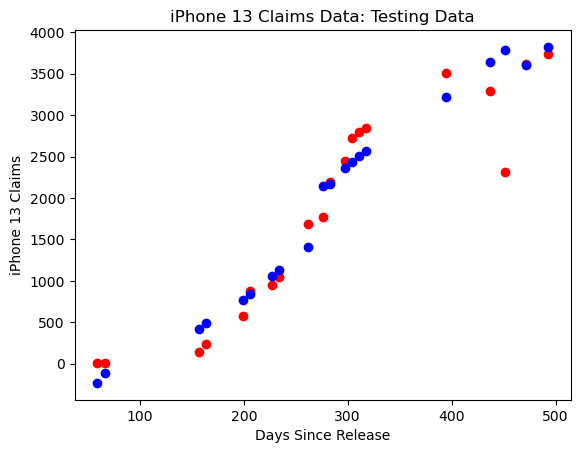

In [37]:
# This graphic is showing how the iPhone 13 Test Data Performed
plt.scatter(X_test['since_release'], y_test, color='red') # plotting the observation line
 
plt.scatter(X_test['since_release'], y_pred , color='blue') # plotting the regression line
 
plt.title("iPhone 13 Claims Data: Testing Data") # stating the title of the graph
 
plt.xlabel("Days Since Release") # adding the name of x-axis
plt.ylabel("iPhone 13 Claims") # adding the name of y-axis
plt.show() # specifies end of graph

In [38]:
display(y_pred)

display(y_test)

array([1129.75687148, 3788.3452742 , -117.2897955 ,  845.71068459,
        774.69913787, 2431.04009915, 3823.19985362, 3220.25290043,
       3610.16521345, 2502.05164588, 2174.36681653, -231.93998468,
        485.65715769, 1413.80305836, 3646.32218076, 2360.02855243,
       2573.0631926 ,  414.64561096, 2146.99391227, 1058.74532475])

26    1042
57    2312
2        6
22     872
21     581
36    2724
63    3740
49    3514
60    3616
37    2791
33    2197
1        3
16     234
30    1692
55    3291
35    2446
38    2840
15     138
32    1776
25     951
Name: claim, dtype: int64

In [39]:
def calc_wmape(actual, pred):
    abs_diff = abs(actual - pred)
    weight = (abs_diff / actual * 100) * actual
    total_weight = weight.sum()
    total_claims = actual.sum()
    return (total_weight/total_claims)

calc_wmape(y_test, y_pred)

# The WMAPE of the linear regression model that is using iPhone 13 data to iPhone 13 testing data is 13.93

13.934376707710728

In [41]:
testing_data 

0     1042
1     2312
2        6
3      872
4      581
5     2724
6     3740
7     3514
8     3616
9     2791
10    2197
11       3
12     234
13    1692
14    3291
15    2446
16    2840
17     138
18    1776
19     951
Name: claim, dtype: int64

# Using iPhone 14 Data as the Test Set

In [44]:
# Doing one-hot encoding on iPhone 14 data
dummies_season_14 = pd.get_dummies(total_set_14_copy.season)
display(dummies_season_14)

dummies_quarter_14 = pd.get_dummies(total_set_14_copy.quarter)
display(dummies_quarter_14)
dummies_holidays_14 = pd.get_dummies(total_set_14_copy.Holidays_Boolean)
display(dummies_holidays_14)

,autumn,winter
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,0,1
7,0,1
8,0,1
9,0,1


,Q1,Q4
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,1,0
8,1,0
9,1,0


,Holidays_False,Holidays_True
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,0,1


In [45]:
merged_14 = pd.concat([total_set_14_copy, dummies_season_14, dummies_holidays_14], axis = 'columns')
display(merged_14)

final_14 = merged_14.drop(['year','season', 'quarter', 'Holidays_Boolean'], axis = 'columns')

# Added these two features or else the model can't run that the feature data is missing
final_14 = final_14.assign(spring = 0)
final_14 = final_14.assign(summer = 0)

display(final_14)

,since_release,claim,year,season,quarter,Holidays_Boolean,autumn,winter,Holidays_False,Holidays_True
0,59,9,2022,autumn,Q4,Holidays_False,1,0,1,0
1,66,30,2022,autumn,Q4,Holidays_True,1,0,0,1
2,73,23,2022,autumn,Q4,Holidays_False,1,0,1,0
3,80,43,2022,autumn,Q4,Holidays_False,1,0,1,0
4,87,32,2022,autumn,Q4,Holidays_False,1,0,1,0
5,94,36,2022,autumn,Q4,Holidays_False,1,0,1,0
6,101,44,2022,winter,Q4,Holidays_True,0,1,0,1
7,108,45,2023,winter,Q1,Holidays_True,0,1,0,1
8,115,59,2023,winter,Q1,Holidays_False,0,1,1,0
9,122,60,2023,winter,Q1,Holidays_True,0,1,0,1


,since_release,claim,autumn,winter,Holidays_False,Holidays_True,spring,summer
0,59,9,1,0,1,0,0,0
1,66,30,1,0,0,1,0,0
2,73,23,1,0,1,0,0,0
3,80,43,1,0,1,0,0,0
4,87,32,1,0,1,0,0,0
5,94,36,1,0,1,0,0,0
6,101,44,0,1,0,1,0,0
7,108,45,0,1,0,1,0,0
8,115,59,0,1,1,0,0,0
9,122,60,0,1,0,1,0,0


In [46]:
# Treating all of iPhone 14 as test set to see how well it does with prediction
X_test_14 = final_14.drop('claim', axis = 1)

# Has to be ordered properly to remove warning
X_test_14 = X_test_14.iloc[:,[0, 1, 5, 6, 2, 3, 4]]

y_test_14 = final_14['claim']

In [47]:
y_pred_14 = model.predict(X_test_14)

display(y_pred_14)

display(y_test_14)

array([-188.30134222, -160.92843796,  -46.27824878,   24.73329794,
         95.74484466,  166.75639139, -197.08540527, -126.07385855,
        -11.42366937,   15.9492349 ,  130.59942408,  201.6109708 ,
        272.62251752])

0       9
1      30
2      23
3      43
4      32
5      36
6      44
7      45
8      59
9      60
10     57
11     54
12    251
Name: claim, dtype: int64

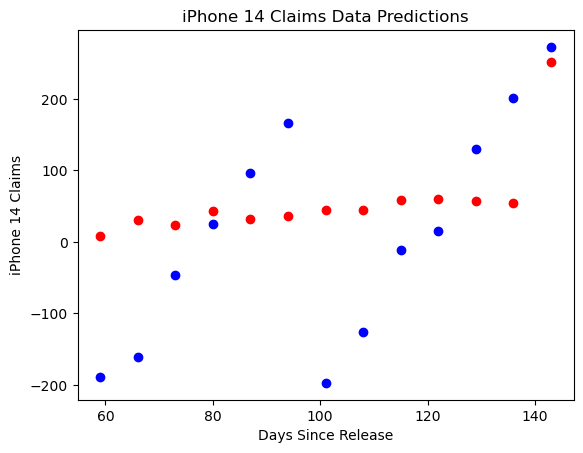

In [48]:
plt.scatter(X_test_14['since_release'], y_test_14, color='red') # plotting the observation line
 
plt.scatter(X_test_14['since_release'], y_pred_14, color='blue') # plotting the regression line
 
plt.title("iPhone 14 Claims Data Predictions") # stating the title of the graph
 
plt.xlabel("Days Since Release") # adding the name of x-axis
plt.ylabel("iPhone 14 Claims") # adding the name of y-axis
plt.show()

In [50]:
# Calculating the WMAPE when using iPhone 14 as the testing data
calc_wmape(y_test_14, y_pred_14)

#iPhone 14 WMAPE Score is 193.77

193.77423657512688

#### Calculating the iPhone 14 March 2023 Predictions

In [40]:
# 171 days is 3/6/2023, season: winter, holidays: no  
# 178 days is 3/13/2023, season: winter, nolidays: no
# 185 days is 3/20/2023, season: spring, holidays: no  
# 192 days is 3/27/2023, season: spring, holidays: no

# 3/6 Prediction
display(model.predict([[171, 0, 0, 0, 1, 1, 0]]))

# 3/13 Prediction
display(model.predict([[178, 0, 0, 0, 1, 1, 0]]))

# 3/20 Prediction
display(model.predict([[185, 0, 1, 0, 0, 1, 0]]))

# 3/27 Prediction
display(model.predict([[192, 0, 1, 0, 0, 1, 0]]))

C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([556.66870441])

C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([627.68025113])

C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([632.67604442])

C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([703.68759114])